In [1]:
%pwd

'/Users/mac/Library/Mobile Documents/com~apple~CloudDocs/GitHub/sales_data_analysis'

# 인사이트(중앙 편의점)
1. 소비 트랜드 만들기 
    - 지역 별 소들 수준 구분
    - 
    - 인당 평균 소비량 감소
    - 1 지역 젊은 여상들의 고가품 소비 증가 경향
    - 5 지역 고령 남성들의 저가품 소비 증가 경향
       |지역|인구(명)|소득|컨셉|연령 분포|소비 집중 시간|
       |-|-|-|-|-|-|
       | 1지역 | 100 | 2억 | 부촌 | 고령남여+ 젊은여 | 일과 시간 소비 |
       | 2지역 | 150 | 1억 | 위성신도시 | 신혼 부부 + 어린 자녀 |  평일 오전, 주말 | 
       | 3지역 | 300 | 5천 | 업무지구 | 30~50대 생상가능인구 | 점심시간, 저녁, (특징: 주말 소비 급감) | 
       | 4지역 | 200 | 1천 | 대학가 | 20대 | 점심시간, 저녁, (특징: 주말 소비 급감) |
       | 5지역 | 250 | 3천 | 일반거주지구 | 노년층 | 늦은 밤 |
       
       -  소득은 정규분포로 데이터 입력
1. 트랜드 분석
    - 평균 1회 결제 금액이 큰 고객을 더 유치하기위한 마케팅 계획 수립을 위한 분석
    - 최근 변화한 소비 트렌드에 가장 민감하게 반응한 소득별 계층 분석
    - 
4. 데이터프레임
    - 상품 데이터프레임
>- product_num* : 상품 코드
>- price* : 상품 가격
>- price_grade : 고가 중가 저가 여부

    - 고객
>- cusno* : 고객 번호
>- region* : 지역  
>- gender* : 성별  
>- age* : 나이  
>- income* : 급여  
>- grade_20 : 2020년 회원 등급
>- grade_21 : 2021년 회원 등급
>- ARPPU_20 : 2020년 회당 평균 결제액
>- ARPPU_21 : 2021년 회당 평균 결제액
>- AVC_20 : 2020년 연간 방문 횟수
>- AVC_21 : 2021년 연간 방문 횟수
>- purchase_trend : 고개 구매 추세 변화
    
    - 거래 데이터프레임
>- num_ts* : 거래 번호
>- cusno_ts* : 고객 변호
>- product_num_ts* : 상품코드
>- price_ts : 상품 가격
>- quantity* : 수량
>- amount : 해당 거래 매출
>- date*: 거래 날짜
>- year, day, time : 거래 년도, 요일, 시간

 **변수명* <- 독립변수로 직접 입력해준 데이터**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

random.seed(0)

## 상품 목록 데이터프레임 만들기 : product

### 상품 목록 데이터프레임 양식 만들기

In [3]:
product = pd.DataFrame(columns=['product_num', 'price', 'price_grade'])
product

,product_num,price,price_grade


### 상품 목록 데이터프레임 데이터 채우기

#### 상품 코드 : product_num

In [4]:
product_num = np.arange(1, 101)
product.product_num = product_num

#### 상품 가격 : price

In [5]:
price = random.sample(list(range(1000, 100000)), 100)
product.price = price

#### 상품 가격 분류 : price_grade

In [6]:
# price_grade : 고가품 : 1, 중가품 : 2, 저가품 : 3

def price_grade(x):
    y = 0
    if x <= 20000:
        y = '3'
    elif x <= 50000:
        y = '2'
    else:
        y = '1'
    return y


product['price_grade'] = product['price'].apply(price_grade)
product

,product_num,price,price_grade
0,1,51494,1
1,2,56125,1
2,3,6306,3
3,4,34936,2
4,5,68013,1
...,...,...,...
95,96,25100,2
96,97,25823,2
97,98,25475,2
98,99,5321,3


## 고객 데이터프레임 만들기 : customer

### 고객 데이터프레임 양식 만들기

In [7]:
customer = pd.DataFrame(columns=['cusno', 'region', 'gender', 'age',  'income', 'grade_20',
                        'grade_21', 'ARPPU_20', 'ARPPU_21', 'AVC_20', 'AVC_21', 'ASC_20', 'ASC_21', 'purchase_trend'])
customer

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend


### 고객 데이터프레임 데이터 채우기

#### 고객 번호 : cusno

In [8]:
cusno = np.arange(10000, 11000)
customer.cusno = cusno

#### 거주 지역 : region

In [9]:
area_1 = np.random.randint(1, 2, size=100).tolist()
area_2 = np.random.randint(2, 3, size=150).tolist()
area_3 = np.random.randint(3, 4, size=300).tolist()
area_4 = np.random.randint(4, 5, size=200).tolist()
area_5 = np.random.randint(5, 6, size=250).tolist()
li = area_1+area_2+area_3+area_4+area_5
random.shuffle(li)

customer.region = li

#### 소득 : income

##### 지역별 소득 분포 산정 : 각각 특성에 맞는 정규분포 사용

In [10]:
customer.income[customer.region == 1] = np.random.normal(10, 3, 100)*20000
customer.income[customer.region == 2] = np.random.normal(10, 2, 150)*10000
customer.income[customer.region == 3] = np.random.normal(10, 1, 300)*5000
customer.income[customer.region == 4] = np.random.normal(10, 2, 200)*1000
customer.income[customer.region == 5] = np.random.normal(10, 0.5, 250)*3000
customer.income = customer.income.map(lambda x: int(x))

##### 소득 컬럼의 통계 요약

In [11]:
customer.describe()

,cusno,region,income
count,1000.000000,1000.000000,1000.000000
mean,10499.500000,3.350000,60102.321000
std,288.819436,1.276373,59454.152776
min,10000.000000,1.000000,3887.000000
25%,10249.750000,2.750000,28521.750000
50%,10499.500000,3.000000,44891.500000
75%,10749.250000,4.250000,60617.500000
max,10999.000000,5.000000,355787.000000


##### 지역별 소득 값 중 이상치 보정

<AxesSubplot:xlabel='region', ylabel='income'>

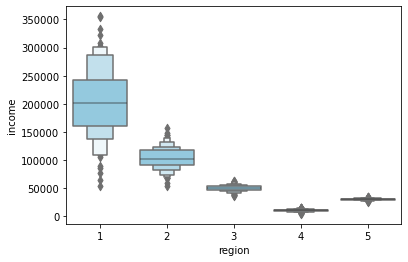

In [12]:
# 지역에 따른 소득 분포 확인 : by boxenplot
sns.boxenplot(x='region', y='income', data=customer, color='skyblue')

In [13]:
# 고객 소득 데이터 이상치 처리
for i in range(1, 6):
    cus_info = customer[customer.region == i].describe()
    # 사분위 수(quartile)
    Q1 = cus_info["income"]["25%"]
    Q3 = cus_info["income"]["75%"]
    # 사분위간 범위(Interquartile range, IQR)
    IQR = Q3 - Q1
    print(f'{i}지역 이상치')
    mask = (customer[customer.region == i].income <= (Q1 - IQR*1.5)
            ) | (customer[customer.region == i].income >= (Q3 + IQR*1.5))
    outlier = customer[customer.region == i][mask].income
    print(outlier)

# lower whisker 보다 작거나, upper whisker 보다 큰 값들을 이상치로 판정
# 1지역: 2개
# 2지역: 0개
# 3지역: 2개
# 4지역: 4개
# 5지역: 2개

# 위와 같이 이상치가 발생하였으나 분석 결과 사전에 설정한 가정에 영향이 없다고 판단되어 보정하지 않음

1지역 이상치
Series([], Name: income, dtype: int64)
2지역 이상치
505    157691
Name: income, dtype: int64
3지역 이상치
76     35401
127    63033
538    63098
Name: income, dtype: int64
4지역 이상치
569    14894
797     3887
960     5556
Name: income, dtype: int64
5지역 이상치
346    25946
603    34706
Name: income, dtype: int64


#### 연령 : age

##### 지역별 연령 데이터 산정

In [14]:
# 1 지역 연령 데이터 생성
age_1_old = np.random.normal(65, 6, 60).tolist()
age_1_young = np.random.normal(24, 3, 40).tolist()
age_1 = age_1_old + age_1_young
customer.age[customer.region == 1] = age_1

# 2 지역 연령 데이터 생성
age_2_old = np.random.normal(40, 3, 100).tolist()
age_2_young = np.random.normal(5, 3, 50).tolist()
age_2 = age_2_old + age_2_young
customer.age[customer.region == 2] = age_2

# # 3 지역 연령 데이터 생성
age_3 = np.random.randint(23, 57, size=300).tolist()
customer.age[customer.region == 3] = age_3

# # 4 지역 연령 데이터 생성
age_4 = np.random.randint(20, 28, size=200).tolist()
customer.age[customer.region == 4] = age_4

# # 5 지역 연령 데이터 생성
age_5 = np.random.randint(50, 85, size=250).tolist()
customer.age[customer.region == 5] = age_5

customer.age = customer.age.map(lambda x: int(x))
customer.age.value_counts().sort_index()

-4      1
 0      3
 1      6
 2      5
 3      2
       ..
 80     7
 81     8
 82     6
 83    11
 84     7
Name: age, Length: 79, dtype: int64

##### 지역별 연령 중 이상치 보정

<AxesSubplot:xlabel='region', ylabel='age'>

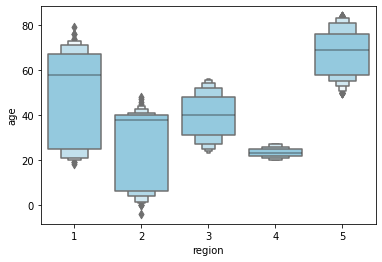

In [15]:
# 지역에 따른 연령 분포 확인 : by boxenplot
sns.boxenplot(x='region', y='age', data=customer, color='skyblue')

In [16]:
# 고객 연령 데이터 이상치 처리
for i in range(1, 6):
    cus_info = customer[customer.region == i].describe()
    # 사분위 수(quartile)
    Q1 = cus_info["age"]["25%"]
    Q3 = cus_info["age"]["75%"]
    # 사분위간 범위(Interquartile range, IQR)
    IQR = Q3-Q1
    print(f'{i}지역 이상치')
    mask = (customer[customer.region == i].age <= (Q1 - IQR*1.5)
            ) | (customer[customer.region == i].age >= (Q3 + IQR*1.5))
    outlier = customer[customer.region == i][mask].age
    print(outlier)

# lower whisker 보다 작거나, upper whisker 보다 큰 값들을 이상치로 판정
# 1지역: 0개
# 2지역: 0개
# 3지역: 0개
# 4지역: 0개
# 5지역: 0개

# 위와 같이 이상치가 발생하였으나 분석 결과 사전에 설정한 가정에 영향이 없다고 판단되어 보정하지 않음

1지역 이상치
Series([], Name: age, dtype: int64)
2지역 이상치
Series([], Name: age, dtype: int64)
3지역 이상치
Series([], Name: age, dtype: int64)
4지역 이상치
Series([], Name: age, dtype: int64)
5지역 이상치
Series([], Name: age, dtype: int64)


In [17]:
# 추가 이상치 검증 : 나이가 음수인 이상치를 절대값을 이용하여 유효한 값으로 보정
customer[customer.age <= 0] = abs(customer[customer.age <= 0])
customer.age.value_counts().sort_index()

0      3
1      6
2      5
3      2
4     11
      ..
80     7
81     8
82     6
83    11
84     7
Name: age, Length: 78, dtype: int64

#### 성별 : gender

##### 지역별 성별 데이터 산정

In [18]:
# 1 지역 성별 데이터 생성
gender_1_male = np.random.randint(0, 1, size=40).tolist()
gender_1_female = np.random.randint(1, 2, size=60).tolist()
gender_1 = gender_1_male + gender_1_female
random.shuffle(gender_1)
customer.gender[customer.region == 1] = gender_1

# 2 지역 성별 데이터 생성
gender_2 = np.random.randint(0, 2, size=150)
customer.gender[customer.region == 2] = gender_2

# 3 지역 성별 데이터 생성
gender_3 = np.random.randint(0, 2, size=300)
customer.gender[customer.region == 3] = gender_3

# 4 지역 성별 데이터 생성
gender_4 = np.random.randint(0, 2, size=200)
customer.gender[customer.region == 4] = gender_4

# 5 지역 성별 데이터 생성
gender_5 = np.random.randint(0, 2, size=250)
customer.gender[customer.region == 5] = gender_5

customer.gender = customer.gender.map(lambda x: int(x))
customer.gender.value_counts().sort_index()

0    480
1    520
Name: gender, dtype: int64

## 거래 데이터 만들기 : purchase

### 거래 데이터프레임 만들기

#### 거래 데이터프레임 양식 만들기

In [19]:
purchase = pd.DataFrame(columns=['num_ts', 'cusno_ts', 'product_num_ts', 'price_ts',
                        'quantity', 'amount', 'date', 'year', 'day', 'time'])
purchase

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,day,time


#### 거래 데이터프레임 데이터 채우기

##### 날짜,요일,시간 : date, day, time

In [20]:
from datetime import datetime
# date
date_list_20 = list(pd.date_range('2020-01-01', '2020-12-31', freq='H'))
date_list_21 = list(pd.date_range('2021-01-01', '2021-12-31', freq='H'))
date_20 = np.random.choice(date_list_20, size=6000).tolist()
date_21 = np.random.choice(date_list_21, size=4000).tolist()
date = date_20 + date_21
random.shuffle(date)
date = pd.Series(date)

# date 중에서 년월일만 추출
purchase.date = date.map(lambda x: datetime.strptime(
    datetime.strftime(x, '%Y-%m-%d'), '%Y-%m-%d'))

# year(년도)
purchase.year = purchase.date.dt.year

# day(요일)
purchase.day = purchase.date.dt.weekday

# 시간
time = date.map(lambda x: x.hour)
purchase.time = time

purchase

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,day,time
0,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-10,2021,6,23
1,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-25,2021,4,14
2,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-29,2020,2,20
3,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-24,2021,5,6
4,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-26,2020,3,8
...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-29,2020,3,10
9996,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-06,2021,4,8
9997,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-06,2021,3,0
9998,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-14,2020,1,13


##### 거래 번호 : num_ts

In [21]:
num_ts = np.arange(0, 10000)
purchase.num_ts = num_ts

##### 고객번호 : cusno_ts

In [22]:
# 기존 cusno가 중복될 수 있도록 만들기
cusno_ts = np.random.choice(list(cusno), size=10000)
purchase.cusno_ts = cusno_ts

##### 상품코드 : product_num_ts

In [23]:
product_num_ts = np.random.choice(list(product_num), size=10000)
purchase.product_num_ts = product_num_ts

price_grade_1 = product[product['price_grade'] == '1'].product_num.tolist()
price_grade_2 = product[product['price_grade'] == '2'].product_num.tolist()
price_grade_3 = product[product['price_grade'] == '3'].product_num.tolist()
price_grade_3

price_grade_1_20 = np.random.choice(price_grade_1, 1000).tolist()
price_grade_2_20 = np.random.choice(price_grade_2, 2000).tolist()
price_grade_3_20 = np.random.choice(price_grade_3, 3000).tolist()
product_num_ts_20 = price_grade_1_20 + price_grade_2_20 + price_grade_3_20
random.shuffle(product_num_ts_20)
purchase[purchase['year'] == 2020].product_num_ts = product_num_ts_20

price_grade_1_21 = np.random.choice(price_grade_1, 2000).tolist()
price_grade_2_21 = np.random.choice(price_grade_2, 1000).tolist()
price_grade_3_21 = np.random.choice(price_grade_3, 1000).tolist()
product_num_ts_21 = price_grade_1_21 + price_grade_2_21 + price_grade_3_21
random.shuffle(product_num_ts_21)
purchase[purchase['year'] == 2021].product_num_ts = product_num_ts_21

##### 상품 가격 : price_ts

In [24]:
def price_ts(x):
    a = str(product[product.product_num == x].price)
    a = int(a.split()[1])
    return a


purchase.price_ts = pd.Series(purchase.product_num_ts.map(price_ts))
purchase

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,day,time
0,0,10198,25,13945,NaN,NaN,2021-01-10,2021,6,23
1,1,10802,30,62884,NaN,NaN,2021-06-25,2021,4,14
2,2,10398,30,62884,NaN,NaN,2020-07-29,2020,2,20
3,3,10375,90,79156,NaN,NaN,2021-04-24,2021,5,6
4,4,10682,99,5321,NaN,NaN,2020-03-26,2020,3,8
...,...,...,...,...,...,...,...,...,...,...
9995,9995,10814,50,94094,NaN,NaN,2020-10-29,2020,3,10
9996,9996,10672,94,32733,NaN,NaN,2021-08-06,2021,4,8
9997,9997,10233,70,11544,NaN,NaN,2021-05-06,2021,3,0
9998,9998,10561,70,11544,NaN,NaN,2020-07-14,2020,1,13


##### 구매수량 : quantity

In [25]:
# 2020년 구매수량 데이터 생성
a_20 = np.random.randint(1, 4, size=4500).tolist()
b_20 = np.random.randint(4, 7, size=3500).tolist()
c_20 = np.random.randint(7, 10, size=2000).tolist()
li_20 = a_20+b_20+c_20
random.shuffle(li_20)
purchase.quantity[purchase.year == 2020] = li_20

# 2021년 구매수량 데이터 생성
a_21 = np.random.randint(1, 4, size=6500).tolist()
b_21 = np.random.randint(4, 7, size=2500).tolist()
c_21 = np.random.randint(7, 10, size=1000).tolist()
li_21 = a_21+b_21+c_21
random.shuffle(li_21)
purchase.quantity[purchase.year == 2021] = li_21

## 종속변수 데이터 생성

### 상품 목록 데이터프레임 종속변수

### 거래 데이터프레임 종속변수

#### 거래별 거래총액 : amount

In [26]:
def amount(x):
    a = str(product[product.product_num == x].price)
    a = int(a.split()[1])
    return a

def price_ts(x):
    a = str(product[product.product_num == x].price)
    a = int(a.split()[1])
    return a

b = purchase.product_num_ts.map(amount)
b = pd.Series(b)

purchase['amount'] = b*purchase.quantity
purchase

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,day,time
0,0,10198,25,13945,3,41835,2021-01-10,2021,6,23
1,1,10802,30,62884,1,62884,2021-06-25,2021,4,14
2,2,10398,30,62884,9,565956,2020-07-29,2020,2,20
3,3,10375,90,79156,1,79156,2021-04-24,2021,5,6
4,4,10682,99,5321,6,31926,2020-03-26,2020,3,8
...,...,...,...,...,...,...,...,...,...,...
9995,9995,10814,50,94094,2,188188,2020-10-29,2020,3,10
9996,9996,10672,94,32733,1,32733,2021-08-06,2021,4,8
9997,9997,10233,70,11544,7,80808,2021-05-06,2021,3,0
9998,9998,10561,70,11544,1,11544,2020-07-14,2020,1,13


### 고객 데이터프레임 종속변수

#### 년도별 고객별 연간 매출액 : ASC_20, ASC_21

In [27]:
li_2020 = []
li_2021 = []
for i in range(10000, 11000):
    a = purchase[(purchase['cusno_ts'] == i) & (purchase["year"] == 2020)]
    b = purchase[(purchase['cusno_ts'] == i) & (purchase["year"] == 2021)]
    li_2020.append(a.sum()[4])
    li_2021.append(b.sum()[4])

customer.ASC_20 = li_2020
customer.ASC_21 = li_2021

#### 년도별 고객 등급 : grade_20, grade_21

In [28]:
# 고객 등급 선정
bin_dividers = np.linspace(customer.ASC_20.min(), customer.ASC_20.max(), 4)
bin_names = ['Silver', 'Gold', 'VIP']  # qcut
customer['grade_20'] = pd.cut(x=customer.ASC_20,  # 데이터 배열
                              bins=bin_dividers,  # 경계값 리스트
                              labels=bin_names,  # bin 이름
                              include_lowest=True)  # 첫 경계값 포함 여부

bin_dividers = np.linspace(customer.ASC_21.min(), customer.ASC_21.max(), 4)
bin_names = ['Silver', 'Gold', 'VIP']
customer['grade_21'] = pd.cut(x=customer.ASC_21,  # 데이터 배열
                              bins=bin_dividers,  # 경계값 리스트
                              labels=bin_names,  # bin 이름
                              include_lowest=True)  # 첫 경계값 포함 여부

#### 년도별 고객별 연간 방문 횟수 : AVC_20, AVC_21

In [29]:
li_2020 = []
li_2021 = []
for i in range(10000, 11000):
    a = purchase[(purchase['cusno_ts'] == i) & (purchase["year"] == 2020)]
    li_2020.append(len(a))
    a = purchase[(purchase['cusno_ts'] == i) & (purchase["year"] == 2021)]
    li_2021.append(len(a))

customer.AVC_20 = li_2020
customer.AVC_21 = li_2021

customer

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,10000,3,1,48,46066,Gold,Silver,NaN,NaN,8,2,35.0,8.0,NaN
1,10001,4,1,24,7948,Gold,Silver,NaN,NaN,7,4,31.0,12.0,NaN
2,10002,5,0,62,29200,Silver,VIP,NaN,NaN,4,9,16.0,40.0,NaN
3,10003,4,0,20,9651,Silver,Silver,NaN,NaN,4,3,25.0,4.0,NaN
4,10004,4,0,23,9571,Silver,Silver,NaN,NaN,3,1,10.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10995,1,1,20,211203,Silver,Silver,NaN,NaN,4,1,21.0,1.0,NaN
996,10996,1,0,23,237870,Gold,Gold,NaN,NaN,6,6,28.0,22.0,NaN
997,10997,3,0,53,47391,VIP,Gold,NaN,NaN,10,7,52.0,28.0,NaN
998,10998,3,0,46,53209,Gold,Gold,NaN,NaN,12,5,45.0,23.0,NaN


#### 년도별 고객별 회당 평균 결제액 : ARPPU_20, ARPPU_21

In [30]:
customer.ARPPU_20 = (customer.ASC_20 / customer.AVC_20).round(2)
customer.ARPPU_21 = (customer.ASC_21 / customer.AVC_21).round(2)
customer.ARPPU_20.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: ARPPU_20
Non-Null Count  Dtype  
--------------  -----  
996 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


#### 고객별 구매 추세 변화 : purchase_trend

In [31]:
customer.purchase_trend = (customer.ASC_21 > customer.ASC_20)
customer

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,10000,3,1,48,46066,Gold,Silver,4.38,4.00,8,2,35.0,8.0,False
1,10001,4,1,24,7948,Gold,Silver,4.43,3.00,7,4,31.0,12.0,False
2,10002,5,0,62,29200,Silver,VIP,4.00,4.44,4,9,16.0,40.0,True
3,10003,4,0,20,9651,Silver,Silver,6.25,1.33,4,3,25.0,4.0,False
4,10004,4,0,23,9571,Silver,Silver,3.33,1.00,3,1,10.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10995,1,1,20,211203,Silver,Silver,5.25,1.00,4,1,21.0,1.0,False
996,10996,1,0,23,237870,Gold,Gold,4.67,3.67,6,6,28.0,22.0,False
997,10997,3,0,53,47391,VIP,Gold,5.20,4.00,10,7,52.0,28.0,False
998,10998,3,0,46,53209,Gold,Gold,3.75,4.60,12,5,45.0,23.0,False


## DataFrame 확인

In [32]:
customer

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,10000,3,1,48,46066,Gold,Silver,4.38,4.00,8,2,35.0,8.0,False
1,10001,4,1,24,7948,Gold,Silver,4.43,3.00,7,4,31.0,12.0,False
2,10002,5,0,62,29200,Silver,VIP,4.00,4.44,4,9,16.0,40.0,True
3,10003,4,0,20,9651,Silver,Silver,6.25,1.33,4,3,25.0,4.0,False
4,10004,4,0,23,9571,Silver,Silver,3.33,1.00,3,1,10.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10995,1,1,20,211203,Silver,Silver,5.25,1.00,4,1,21.0,1.0,False
996,10996,1,0,23,237870,Gold,Gold,4.67,3.67,6,6,28.0,22.0,False
997,10997,3,0,53,47391,VIP,Gold,5.20,4.00,10,7,52.0,28.0,False
998,10998,3,0,46,53209,Gold,Gold,3.75,4.60,12,5,45.0,23.0,False


In [33]:
product

,product_num,price,price_grade
0,1,51494,1
1,2,56125,1
2,3,6306,3
3,4,34936,2
4,5,68013,1
...,...,...,...
95,96,25100,2
96,97,25823,2
97,98,25475,2
98,99,5321,3


In [34]:
purchase

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,day,time
0,0,10198,25,13945,3,41835,2021-01-10,2021,6,23
1,1,10802,30,62884,1,62884,2021-06-25,2021,4,14
2,2,10398,30,62884,9,565956,2020-07-29,2020,2,20
3,3,10375,90,79156,1,79156,2021-04-24,2021,5,6
4,4,10682,99,5321,6,31926,2020-03-26,2020,3,8
...,...,...,...,...,...,...,...,...,...,...
9995,9995,10814,50,94094,2,188188,2020-10-29,2020,3,10
9996,9996,10672,94,32733,1,32733,2021-08-06,2021,4,8
9997,9997,10233,70,11544,7,80808,2021-05-06,2021,3,0
9998,9998,10561,70,11544,1,11544,2020-07-14,2020,1,13


## 데이터프레임 Merge

In [41]:
df = purchase.merge(customer, how='left', left_on='cusno_ts', right_on='cusno', left_index=False,
                    right_index=False, sort=False, suffixes=('_ts', '_c'), copy=True, indicator=False, validate=None)
df = df.merge(product, how='left', left_on='product_num_ts',
              right_on='product_num', suffixes=('', '_p'), copy=True, indicator=False,)
# df = df.drop(['cusno_ts', 'product_num_ts', 'price_ts'], axis=1)
df

,num_ts,quantity,amount,date,year,day,time,cusno,region,gender,...,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend,product_num,price,price_grade
0,0,3,41835,2021-01-10,2021,6,23,10198,4,0,...,6.20,5.67,5,6,31.0,34.0,True,25,13945,3
1,1,1,62884,2021-06-25,2021,4,14,10802,5,1,...,5.00,3.25,6,4,30.0,13.0,False,30,62884,1
2,2,9,565956,2020-07-29,2020,2,20,10398,3,0,...,5.83,2.25,6,4,35.0,9.0,False,30,62884,1
3,3,1,79156,2021-04-24,2021,5,6,10375,3,1,...,4.60,3.33,10,6,46.0,20.0,False,90,79156,1
4,4,6,31926,2020-03-26,2020,3,8,10682,2,1,...,5.50,1.80,10,5,55.0,9.0,False,99,5321,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2,188188,2020-10-29,2020,3,10,10814,3,1,...,3.67,3.00,6,3,22.0,9.0,False,50,94094,1
9996,9996,1,32733,2021-08-06,2021,4,8,10672,1,1,...,4.00,3.60,8,5,32.0,18.0,False,94,32733,2
9997,9997,7,80808,2021-05-06,2021,3,0,10233,3,0,...,5.00,2.50,6,4,30.0,10.0,False,70,11544,3
9998,9998,1,11544,2020-07-14,2020,1,13,10561,4,0,...,2.75,3.40,8,5,22.0,17.0,False,70,11544,3


In [46]:
df = df.loc[:,['num_ts', 'date', 'product_num', 'price', 'price_grade', 'quantity', 'amount',
        'year', 'day', 'time', 'cusno', 'region', 'gender', 'age', 'income',
        'grade_20', 'grade_21', 'ARPPU_20', 'ARPPU_21', 'AVC_20', 'AVC_21', 'ASC_20', 'ASC_21', 'purchase_trend']]
df

,num_ts,date,product_num,price,price_grade,quantity,amount,year,day,time,...,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,0,2021-01-10,25,13945,3,3,41835,2021,6,23,...,8958,Gold,Gold,6.20,5.67,5,6,31.0,34.0,True
1,1,2021-06-25,30,62884,1,1,62884,2021,4,14,...,27892,Gold,Silver,5.00,3.25,6,4,30.0,13.0,False
2,2,2020-07-29,30,62884,1,9,565956,2020,2,20,...,45535,Gold,Silver,5.83,2.25,6,4,35.0,9.0,False
3,3,2021-04-24,90,79156,1,1,79156,2021,5,6,...,44359,Gold,Gold,4.60,3.33,10,6,46.0,20.0,False
4,4,2020-03-26,99,5321,3,6,31926,2020,3,8,...,106721,VIP,Silver,5.50,1.80,10,5,55.0,9.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2020-10-29,50,94094,1,2,188188,2020,3,10,...,48337,Silver,Silver,3.67,3.00,6,3,22.0,9.0,False
9996,9996,2021-08-06,94,32733,2,1,32733,2021,4,8,...,201157,Gold,Gold,4.00,3.60,8,5,32.0,18.0,False
9997,9997,2021-05-06,70,11544,3,7,80808,2021,3,0,...,47490,Gold,Silver,5.00,2.50,6,4,30.0,10.0,False
9998,9998,2020-07-14,70,11544,3,1,11544,2020,1,13,...,12100,Silver,Silver,2.75,3.40,8,5,22.0,17.0,False


In [47]:
df.isnull().sum()

num_ts             0
date               0
product_num        0
price              0
price_grade        0
quantity           0
amount             0
year               0
day                0
time               0
cusno              0
region             0
gender             0
age                0
income             0
grade_20           0
grade_21           0
ARPPU_20          14
ARPPU_21          76
AVC_20             0
AVC_21             0
ASC_20             0
ASC_21             0
purchase_trend     0
dtype: int64

In [48]:
df.AVC_20.value_counts().sort_index()

0       14
1       96
2      286
3      566
4     1182
5     1316
6     1474
7     1571
8     1036
9     1020
10     773
11     340
12     239
13      68
14      19
Name: AVC_20, dtype: int64

In [49]:
df.AVC_21.value_counts().sort_index()

0       76
1      469
2     1274
3     1913
4     1720
5     1783
6     1227
7      718
8      429
9      293
10      64
11      17
12      17
Name: AVC_21, dtype: int64

## 데이터 분석 및 시각화

<AxesSubplot:xlabel='a'>

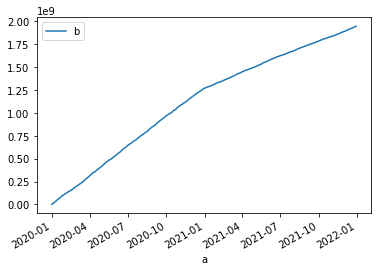

In [50]:
dff_date = purchase.date.unique()
dff_date = pd.Series(dff_date, name='a')
dff_date = dff_date.sort_values()
dff_date.reset_index(drop=True, inplace=True)
dff_date
li = []
for i in dff_date:
    c = purchase[(purchase['date'] == i)].amount.sum()
    li.append(c)

li = pd.Series(li, name='b')
li = li.cumsum()
li
df = pd.concat([dff_date, li], axis=1)
df.set_index('a', inplace=True)
df
df.plot()

In [ ]:
df = purchase.merge(product, left_on='ts_product_num',
                    right_on='product_num', how='outer')
df

# df = df.price_grade.map(lambda x: int(x))
df_20 = df[df['year'] == 2020].price_grade.value_counts()
df_20
df_21 = df[df['year'] == 2021].price_grade.value_counts()
df_21

df_00 = pd.concat([df_20, df_21], axis=1)
df_00.plot(kind='bar')

# y = df
# x = range(len(y))
# plt.figure(figsize=(10,6))
# plt.bar(x,y,width=0.7,color='skyblue')
# plt.title('Bar Plot',size=30)

In [ ]:
grid = sns.FacetGrid(purchase, row='year', col='day', height=2.2, aspect=1.6)
grid.map(plt.hist, 'amount', alpha=.5, bins=20)
grid.add_legend()

In [ ]:
grid = sns.FacetGrid(X_train, row='embarked',
                     col='survived', height=2.2, aspect=1.6)

# 바그래프로 시각화, x: 성별, y: 요금, Error bar: 표시 안 함
grid.map(sns.barplot, 'sex', 'fare', alpha=.5,
         ci=None, order=["male", "female"])

grid.add_legend()

In [ ]:
grid = sns.FacetGrid(X_train, row='embarked', height=2.2, aspect=1.6)

# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep',
         order=[1, 2, 3], hue_order=["male", "female"])

grid.add_legend()

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속 변수 분리
X = df_1[['gender_c', 'age_c', 'region_c', 'ARPPU_20_c',
          'AVC_20_c', 'AVC_21_c', 'amount_20_p']]
y = df_1['sales_trend']

# 학습용 테이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=10)
print(X_train.shape)
print(X_test.shape)

In [ ]:
# Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print(dt_pred[0:10])
print(y_test.values[0:10])

accuracy = accuracy_score(y_test, dt_pred)
print('dt 예측 정확도 :', accuracy)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
print('lr 예측 정확도 :', accuracy)